# <span style="color:blue"> NSL Exercise lesson 3. </span> 
 
## <span style="color:red"> Exercise 3.1. </span>
 
### 1. & 2.

The exercise requires to compute at time $t=0$ the European call-option price and put-option price:

1. by sampling directly the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. by sampling the discretized $GBM(r,\sigma^2)$ path of the asset price dividing $[0,T]$ in $10^2$ time intervals.

In particular, for the first case the asset price is computed directly using 

$$S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$$ 

where $S(0)$ is the asset intial value while $W(T)\sim\mathcal{N}(0,T)$, that is a random number generated using a normal distribution with mean value $\mu=0$ and standard deviation $\sigma^2=T$. Also, all the increments of $W$ are independent and normally distributed. Therefore, the discretized values can be computed as 

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

where $Z_i \sim \mathcal{N}(0,1)$ and $t_{i}$, $t_{i+1}$ are the extreme vaues of a gneric time interval. 

All the simulations were carried out choosing $S(0)=100$, $T=1$, $K=100$, $r=0.1$ and $\sigma=0.25$. The script below loads data created by the attached C++ code.

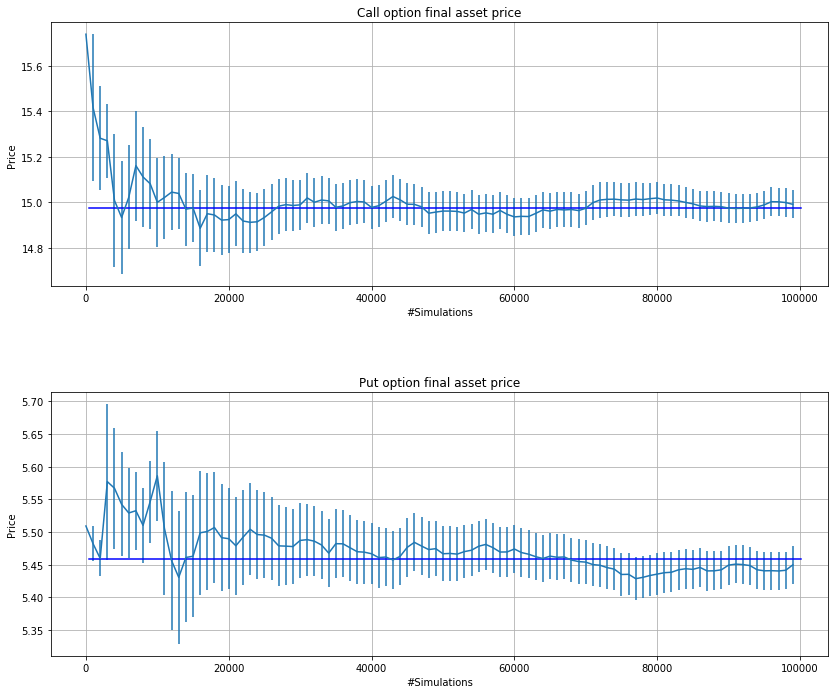

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, call, call_err, put, put_err = np.loadtxt("Datas/data1.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, call, yerr=call_err)
ax[0].axhline(y=14.9758,xmin=0.05, xmax=0.965,color='b',linestyle='-')
ax[0].set_title("Call option final asset price")
ax[0].set(xlabel="#Simulations", ylabel="Price")
ax[0].grid(True)

ax[1].errorbar(x, put, yerr=put_err)
ax[1].axhline(y=5.4595,xmin=0.05, xmax=0.965,color='b',linestyle='-')
ax[1].set_title("Put option final asset price")
ax[1].set(xlabel="#Simulations", ylabel="Price")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

It can be seen that the final asset prices converge to the values obtained as analytic solutions of Black-Scholes equations, both in call-option and put-option cases. 

The code below loads all the data obtained using the time-discretization method as it has been previously described.

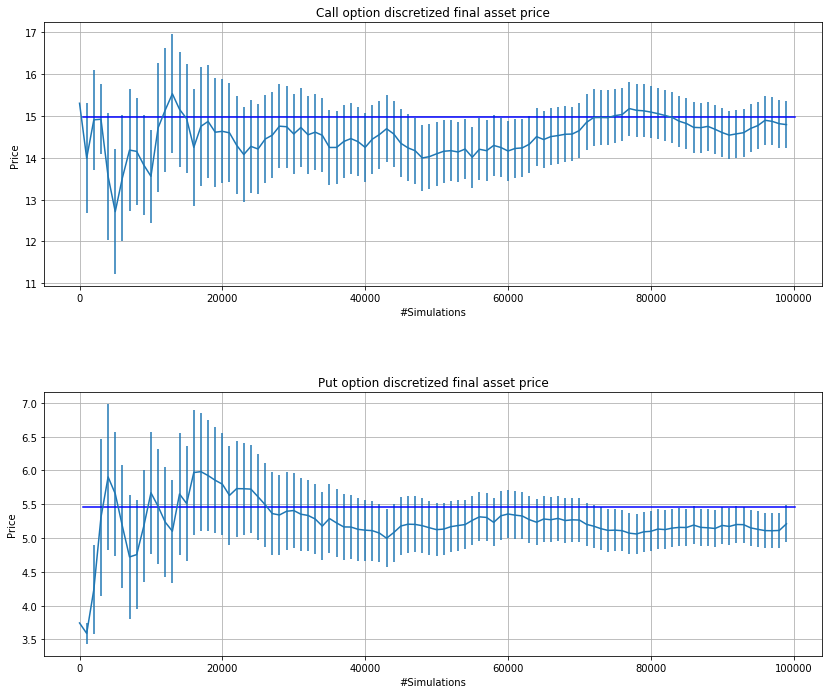

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, call, call_err, put, put_err = np.loadtxt("Datas/data2.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, call, yerr=call_err)
ax[0].axhline(y=14.9758,xmin=0.05, xmax=0.965,color='b',linestyle='-')
ax[0].set_title("Call option discretized final asset price")
ax[0].set(xlabel="#Simulations", ylabel="Price")
ax[0].grid(True)

ax[1].errorbar(x, put, yerr=put_err)
ax[1].axhline(y=5.4595,xmin=0.05, xmax=0.965,color='b',linestyle='-')
ax[1].set_title("Put option discretized final asset price")
ax[1].set(xlabel="#Simulations", ylabel="Price")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

Again, you can clearly see that as the number of simulations grows, the asset price tends to the expected one in both options.